# INF8111 - Fouille de données / Data Mining
## Automne 2020 - TP3 - Fouille de réseaux sociaux / Mining of social networks
### Membres de l'équipe / Team members
    - Louis Duhem (2096706) 1
    - Jean-Sébastien Patenaude (1961302) 2
    - Pentcho Tchomakov (1735762) 3


## Instructions de remise / Submission

Vous devez remettre dans la boîte de remise sur moodle:

1. ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Assurez-vous que tous les résultats soient lisibles lorsque le notebook est ouvert.

Tout devra être remis avant le **23 juin 2021 à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour ouvrable de retard.

## Barème

Partie 1: 14 points

Partie 2: 6 points

Pour un total de 20 points.


---

## Submission

You must put back in the submission box on moodle:

1. this file renamed TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb

**N.B**: Make sure that all results are there when you open your notebook.

Everything must be submitted before **June 26th 2021 à 23h55**. Any late work will be penalized with a value of 10% per open day of delay.

## Barème
Part 1: 14 points

Part 2: 6 points

For a total of 20 points.


## Réseaux sociaux / Social Networks
Les réseaux sociaux occupent une grande partie de la vie humaine. Chaque personne appartient tout le long de sa vie à différentes communautés. Avec le rassemblage de ces informations sur les différentes plateformes en ligne de réseaux sociaux, les analystes de données ont voulu exploiter ces données. C'est un domaine relativement nouveau qui est en pleine croissance avec plusieurs impacts sur plusieurs aspects tels que la publicité et les systèmes de recommandation. 

### But
Le but de ce TP est de vous donner un aperçu de l'analyse d'un réseau social.

Dans la première partie, vous implémenterez un algorithme de détection de communautés dans un réseau social nommé LPAm+. Cet algorithme a été proposé par [X. Liu et T. Murata en 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

Dans la deuxième partie, vous trouverez les personnes avec le plus d'influence dans leur réseau social. 

Pour les deux parties, nous vous fournissons les CSV contenant les réseaux sociaux à analyser.


---

## Social networks
Social networks are a major component of the human life. Each person belongs throughout their life to different communities. With the aggregation of information on various online social media platforms, data analysts were interested in exploiting its data. It is a relatively new field that is growing with impacts on several aspects such as advertising and recommendation systems.


### Goal
The purpose of this lab is to give you an overview of social network analysis.

In the first part, you will implement an algorithm for detecting communities in a social network called LPAm+. This algorithm was proposed by [X. Liu and T. Murata in 2010](https://www.sciencedirect.com/science/article/pii/S0378437109010152).

In the second part, you will find the people with the most influence in their social network.

For both parts, we provide you with the CSV containing the social networks to be analysed.

# 1. LPAm+ (14 points)

## Détection de communauté
La détection de communauté dans un réseau social est une manipulation fréquente lors de l'analyse d'un réseau. Une méthode de clustering est utilisée pour rassembler les personnes dans des communautés selon les liens entre eux. 

## LPAm+
Dans cette partie, vous implémenterez l'algorithme LPAm+ pour détecter les communautés parmi les personnages de Games of Thrones. Vous devez utiliser les CSV *nodes* et *edges* pour cela. 

Cet algorithme consiste à propager les étiquettes dans le réseau selon une règle d'évaluation optimisant la modularité du réseau. Lorsque l'algorithme atteint un optimum local, il regarde s'il peut combiner deux communautés pour augmenter la modularité du réseau. L'algorithme choisit toujours la combinaison la plus avantageuse. Si une combinaison est trouvée, la propagation des étiquettes est refaite. L'algorithme continue tant qu'elle peut améliorer la modularité. Vous pouvez lire l'article mentionné plus haut pour plus de détails, mais cela n'est pas nécessaire puisque vous allez être guidé tout le long du TP. 

Pour faciliter la représentation du réseau, nous vous proposons d'utiliser le package networkx. La documentation est disponible [ici](https://networkx.github.io/documentation/stable/tutorial.html).



---

# 1. LPAm+ (14 points)


## Community detection
Community detection in a social network is a frequent manipulation when analysing a network. A clustering method is used to bring people together in communities according to the links between them.


## LPAm+
In this part, you will implement the LPAm+ algorithm to detect the communities among the characters of Games of Thrones. You must use the nodes and edges csv for this.

This algorithm consists in propagating the labels in the network according to an evaluation rule optimizing the modularity of the network. When the algorithm reaches a local optimum, it checks whether it can combine two communities to increase the modularity of the network. The algorithm always chooses the most advantageous combination. If a combination is found, the propagation of the labels is redone. The algorithm continues until it is no longer able to increase modularity. You can read the article mentioned above for more details, but you do not need to, as you will be guided throughout the TP.


To help you represent a network, we suggest that you use the networkx package.You can read more about the package [here](https://networkx.github.io/documentation/stable/tutorial.html).

In [1]:
# vous pouvez bien sûr utiliser anaconda pour installer les packages
!pip install --user numpy
!pip install --user pandas
!pip install --user matplotlib
!pip install --user networkx

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/Users/tchomako/workspace/INF8111-TP/env/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/Users/tchomako/workspace/INF8111-TP/env/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/Users/tchomako/workspace/INF8111-TP/env/bin/python3.7 -m pip install --upgrade pip' command.
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.
You should consider upgrading via the '/Users/tchomako/workspace/INF8111-TP/env/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import networkx as nx
import random
import itertools
import math


class LPAmPlus:
    """
    Constructor
    """

    def __init__(self, graph):
        """
        graph gives the graph on which the algorithm will be applied;
        """
        self.graph = graph


        """
        Assign a label to each node
        """
        #TODO (done)
        label_init=0
        for u in list(self.graph.nodes):
            self.graph.nodes[u]['label']=label_init
            label_init+=1
            

        """
        labels gives all the communities present in the network
        """
        self.labels = [label for label in [self.graph.nodes[u]['label'] for u in list(self.graph.nodes)]]

       

    """
    Term to optimize when replacing labels
    """

    def label_evaluation(self, current_node, new_label):
        #TODO (done)
        optimize_value = 0
        node_list = list(self.graph.nodes)
        B = nx.linalg.modularity_matrix(self.graph)
        u_ind=0
        current_node_ind=node_list.index(current_node)
        for u in node_list:
            if u !=current_node:
                optimize_value+=B[u_ind,current_node_ind]*(self.graph.nodes[u]['label']==new_label)
            u_ind+=1
        return optimize_value

    """
    Function to choose the new label for a node
    """

    def update_label(self, current_node):
        #TODO (done)
        node_list=list(self.graph.nodes)
        label_values=[]
        for label in self.labels:
            label_values.append((label,self.label_evaluation(current_node,label)))
        dict_label=dict(label_values)
        self.graph.nodes[current_node]['label']=max(dict_label, key=dict_label.get)
        used_labels=[]
        for u in node_list:
            label=self.graph.nodes[u]['label']
            if label not in used_labels:
                used_labels.append(label)
        self.labels=used_labels
        pass

    """
    Function that calculates the current modularity of the network
    """

    def modularity(self):
        #TODO (done)
        modul = 0
        node_list = list(self.graph.nodes)
        B = nx.linalg.modularity_matrix(self.graph)
        u_ind=0
        for u in node_list:
            v_ind=0
            for v in node_list:
                modul += B[u_ind,v_ind]*(self.graph.nodes[u]['label']==self.graph.nodes[v]['label']) 
                v_ind+=1
            u_ind+=1
        return (modul/2/len(list(self.graph.edges)))
    
    
    """
    Function that applies the LPAm algorithm on the network
    """

    def LPAm(self):
        #TODO (done)
        max_modul=-1
        while(self.modularity()>max_modul):
            max_modul=self.modularity()
            print(max_modul)
            node_list = list(self.graph.nodes)
            for u in node_list:
                self.update_label(u)
        pass
        
    """
    Function that find which communities to combine and combine them
    """
    def merge_communities(self):
        #TODO (done)
        merge_done=False
        #go_back = False
        node_list=list(self.graph.nodes)
        max_modul=self.modularity()
        merge_values=[]
        for label_to_merge in self.labels:
            for new_label in self.labels:
                modified_nodes=[]
                #go_back=True
                for u in node_list:
                    if self.graph.nodes[u]['label']==label_to_merge:
                        self.graph.nodes[u]['label']=new_label
                        modified_nodes.append(u)
                new_modul = self.modularity()
                #go_back = False
                merge_values.append(((label_to_merge,new_label),new_modul))
                for u in modified_nodes:
                    self.graph.nodes[u]['label']=label_to_merge
                    
        dict_merge=dict(merge_values)
        label_to_merge,new_label=max(dict_merge, key=dict_merge.get)
        if label_to_merge==new_label:
            merge_done=False
        else:
            merge_done=True
            
        for u in node_list:
            if self.graph.nodes[u]['label']==label_to_merge:
                self.graph.nodes[u]['label']=new_label
        
        used_labels=[]
        for u in node_list:
            label=self.graph.nodes[u]['label']
            if label not in used_labels:
                used_labels.append(label)
        self.labels=used_labels
        print(self.labels)
        print(self.modularity())
        return merge_done
    
    
    """
    Function that applies the LPAm+ algorithm on the network
    """

    def find_communities(self):
        #TODO (done)
        self.LPAm()
        merge=self.merge_communities()
        while merge:
            merge=self.merge_communities()
        pass

### 1.1 Dataset (1 point)

Nous vous avons fourni les CSV pour toutes les saisons de Games of Thrones. Vous devez maintenant représenter ces réseaux en utilisant les deux CSV fournis pour chaque saison: un pour les sommets et un pour les arêtes. 


#### Implémentation
1. Implémentez  la fonction  *`load_unweighted_network`*. Cette fonction retourne le réseau non dirigé et sans poids.

Utilisez la fonction `test_load` pour vérifier votre implémentation de la fonction. Ce test utilise un petit toy dataset. Vous devriez avoir quelque chose de similaire (data/picture.png):
![title](data/picture.png)


---
We have provided you with the csv for all the seasons of Games of Thrones. You must now represent each of those networks in code using two csv for each season: the one for the nodes and the one for the edges.


#### Implementation
1. Implement the function *`load_unweighted_network`*. This function returns a undirected and unweighted graph.

Use the function `test_load` to verify your implementation of the function. This test use a toy dataset. You should obtain a result similar to this (data/picture.png):
![title](data/picture.png)


In [3]:
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def load_unweighted_network(node_csv, edge_csv):
    network = nx.Graph()
    with open(node_csv) as csv_node:
        csv_n=csv.reader(csv_node,delimiter=',')
        i=0
        for row in csv_n:
            if i==0:
                i+=1
            else:
                network.add_node(int(row[0]))
    with open(edge_csv) as csv_edge:
        csv_e=csv.reader(csv_edge,delimiter=',')
        i=0
        for row in csv_e:
            if i==0:
                i+=1
            else:
                network.add_edge(int(row[0]),int(row[1]))
    return network

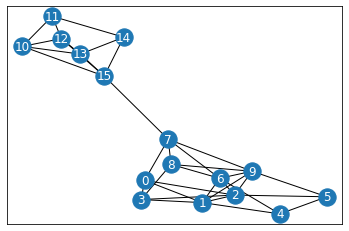

In [4]:
import matplotlib.pyplot as plt
def test_load():
    network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    nx.draw_networkx(network,font_color='white')
    plt.show()

test_load()

### 1.2  Modularité / Modularity (2 point)

La modularité $Q$ du réseau est une mesure importante pour l'algorithme: elle permet de savoir si l'algorithme a atteint un optimum local. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: le nombre d'arêtes
- l: l'étiquette du sommet
- u, v: des sommets dans le réseau
- B: la matrice de modularité où chaque élément vaut $A_{uv} - P_{uv}$
- $A_{uv}$: vaut 1 si il y une arête entre u et v sinon 0
- $P_{uv}$: la probabilité qu'il y ait une arête entre u et v selon le modèle nul  $$P_{uv}=\frac{degree(u)*degree(v)}{2m}$$
- $\delta(l_u,l_v)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0

#### Implémentation
1. Implémentez  la fonction  `modularity`  dans LPAmPlus. Cette fonction retourne la modularité du réseau. Vous pouvez utiliser la fonction `nx.linalg.modularity_matrix` de networkx pour calculer la matrice B. **N.B:** Networkx permet d'ajouter du data sur les sommets pour garder des informations sur le node. Les nodes agissent comme des dictionnaires.

Utilisez la fonction `test_modularity` pour vérifier votre implémentation de la fonction. Vous devriez obtenir une modularité d'environ 0.413.

---

The modularity $Q$ of the network is an important measure for the algorithm. The algorithm uses it to determine if it reached a local optimum or not. $$ Q=\frac{1}{2m}\sum_{u,v=1}^n B_{uv}\delta(l_u,l_v)$$ 

- m: number of edges
- l: node's label
- u, v: nodes in the graph
- B: modularity matrix where each element is $A_{uv} - P_{uv}$
- $A_{uv}$: is 1 if there is an edge between u and v else 0
- $P_{uv}$: probability that there is an edge between u and v following the null model $$P_{uv}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l_v)$: Kronecker's delta, is 1 if labels are the same else 0

#### Implementation
1. Implement the function `modularity` in the class LPAmPlus. This function returns the modularity of the network. You can use the function `nx.linalg.modularity_matrix` from networkx to calculate B. **N.B:** You can add data to nodes with Networkx to store information about the node. You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.

Use the function `test_modularity` to test your implementation. You should have a modularity of 0.413.

In [5]:
def test_modularity():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.labels = [0, 1]
    for i in [0,1,2,3,4,5,6,7,8,9]:
        lpam.graph.nodes[i]['label'] = 0
    for i in [10,11,12,13,14,15]:
        lpam.graph.nodes[i]['label'] = 1
    print("Modularity: {:.3f}".format(lpam.modularity()))

test_modularity()

Modularity: 0.413


### 1.3 Règle de modification des étiquettes / Updating rule for the labels (3 point)

Comme mentionné plus haut, l'algorithme est fortement basé sur son optimisation de la modularité. Il vous est maintenant demandé d'implémenter le terme à optimiser. La nouvelle étiquette $l_x^{new}$ correspond à l'étiquette pour laquelle la somme donne la plus grande valeur.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: le nombre de sommets
- m: le nombre d'arêtes
- l: une étiquette possible pour le sommet x
- x: le sommet qu'on évalue en ce moment
- u: un autre sommet dans le réseau (commence à 1, car on exclut le sommet x)
- B: la matrice de modularité où chaque élément vaut $A_{ux} - P_{ux}$
- $A_{ux}$: vaut 1 si il y une arête entre u et x sinon 0
- $P_{ux}$: la probabilité qu'il y ait une arête entre u et x selon le modèle nul  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: delta de Kronecker, vaut 1 si les deux labels sont identiques sinon 0


#### Implémentation
1. Implémenter la fonction `label_evaluation`. Cette fonction retourne la valeur du terme à optimiser. Vous pouvez utiliser la fonction `linalg.modularity_matrix` de networkx pour calculer la matrice B. Il est normal qu'il y ait une ressemblance avec le calcul de la modularité selon la définition que vous avez prise. `new_label` correspond donc à un $l$ possible dans le terme.
2. Implémenter la fonction `update_label`. Cette fonction choisit la nouvelle étiquette pour le sommet actuel. En cas d'égalité, la fonction choisit une étiquette au hasard parmi les meilleurs. N'oubliez pas d'enlever les étiquettes désuètes du paramètre `labels`. **N.B:** Il est possible que la meilleure étiquette soit celle actuelle du sommet.

Networkx permet d'ajouter du data sur les sommets. Les sommets sont des dictionnaires dans le graphe.

---

As mentioned above, the algorithm is strongly based on its optimization of modularity. You are now asked to implement the term to optimize. The new label $l_x^{new}$ corresponds to the label for which the sum gives the greatest value.
$$l_x^{new}=\arg\max_l\sum_{u=1}^n B_{ux}\delta(l_u,l)$$

- n: number of nodes
- m: number of edges
- l: a possible label for the node x
- x: current node being evaluated
- u: another node in the network (starts at 1, because we exclude the node x)
- B: modularity matrix where each element is $A_{ux} - P_{ux}$
- $A_{ux}$: is 1 if there is an edge between u and x else 0
- $P_{ux}$: the probability that there is an edge between u and x  following the null model  $$P_{ux}=\frac{degree(u)*degree(x)}{2m}$$
- $\delta(l_u,l)$: Kronecker's delta, is 1 if labels are the same else 0


#### Implementation
1. Implement the function `label_evaluation`. This function returns the value for the term to optimize. You can use the function `linalg.modularity_matrix` from networkx to calculate B. It is normal if there is a similarity with the modularity depending on the definition you took. `new_label` represent a possible $l$ in the term.
2. Implement the function `update_label`. This function chooses the new label for the current node. If there is more than one label with the max value, the function chooses randomly one amoung those. Don't forget to remove the unused labels from the `labels` attribute. **N.B:** The best label can be the node's current label. 

You can add data to nodes with Networkx to store information about the node. The nodes act like a dictionnary.



### 1.4 LPAm (2 points)

Vous pouvez maintenant implémenter l'algorithme LPAm. Cet algorithme est le prédécesseur de LPAm+ puisque LPAm+ a été crée pour contourner une faiblesse de LPAm.  LPAm est un algorithme de propapagation d'étiquettes basé sur la modularité. Il commence par donner une étiquette unique à chaque sommet. Il explore par la suite tous les sommets et change leur étiquette selon la fonction d'évaluation que vous avez implémentée plus tôt. L'algorithme continue la propagation d'étiquette à travers tous les sommets jusqu'à un optimun de la modularité.

#### Implémentation
1. Ajouter les étiquettes initiales aux sommets du graphe dans la fonction `__init__`. Il faut que chaque sommet soit dans sa propre communauté au début de l'algorithme. Initialiser le paramètre `labels` pour qu'il contient la liste des étiquettes présentes dans le réseau.

2. Implémenter l'algorithme LPAm dans la fonction `LPAm`. Assurez-vous de toujours augmenter la modularité lors de vos changements d'étiquettes. N'oubliez pas de garder le paramètre `labels` à jour à fur et à mesure lors de vos changements pour ne pas évaluer plusieurs fois la même étiquette.

Utilisez la fonction `test_lpam` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.399 avec 4 communautés.

---

You can now implement the LPAm algorithm. This algorithm is the predecessor of LPAm+ since LPAm+ was created to overcome LPAm's weakness. LPAm is a label probagation algorithm based on modularity. It begins by giving a unique label to each node. It then explores all the nodes and changes their label according to the evaluation function that you implemented earlier. The algorithm continues until it can no longer improve the modularity of the network.

#### Implementation
1. Add the initial labels to the nodes in the graph in the function `__init__`. Each nodes has to be in their own community in the beginning. Initialise `labels` with the current list of labels present in the graph.

2. Implement the LPAm algorithm in the function`LPAm`. Make sure that all your labels changes improve the modularity. Don't forget to keep your `labels` parameter is kept up-to-date so that you dont evaluate the same label multiple times or unused labels.

Use the function `test_lpam` to verify your implementation. You should have a modularity of 0.399 with 4 communities.

In [6]:
def test_lpam():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.LPAm()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam()

-0.06653061224489797
0.326122448979592
0.39877551020408175
Modularity: 0.399
Communities: [3, 5, 8, 11]


### 1.5 LPAm+ (3 point)

Vous pouvez maintenant implémenter LPAm+ au complet. LPAm+ est une amélioration de LPAm. Lorsque LPAm tombe dans un optimum local, LPAm+ essaye de combiner deux communautés pour augmenter la modularité et ainsi sortir du optimum local. LPAm+ choisit la combinaison qui augmente le plus la modularité et recommence la propagation d'étiquette jusqu'au prochain optimum local où il va reessayer de combiner des communautés. L'algorithme continue jusqu'à qu'il ne peut plus augmenter la modularité.

#### Implémentation
1. Implémentez  la fonction  `merge_communities`. Cette fonction regarde si combiner des communautés augmente la modularité et combine le meilleur choix. Elle retourne True si une combinaison a été faite sinon False (aucune combinaison augmente la modularité).
2. Implémenter `find_communities`. Cette fonction applique l'algorithme LPAm+ sur le réseau en utilisant les fonctions `LPAm` et `merge_communities`.

Utilisez la fonction `test_lpam_plus` pour vérifier votre implémentation. Vous devriez finir avec une modularité d'environ 0.413 et 2 communautés.

---

You can now fully implement LPAm+. As said before LPAm+ is an amelioration of LPAm. The issue with LPAm is that it stops when it finds a local optimun. To prevent that, LPAm+ tries to combine two communities to increase modularity and escape the local optimun. LPAm+ chooses the combination that most increases modularity and restart the label's propagation until the next local optimum where it will try to combine two communities again. The algorithm continues until it can no longer increase modularity.

#### Implementation
1. Implement the function  `merge_communities`. This function check if combining communities improve the modularity and combine the best choice. It returns True if a combinaison was made else False (no combination increase the modularity).
2. Implement the LPAM+ algorithm in the function `find_communities` using the fonctions `LPam` and `merge_communities`.

Use the function `test_lpam_plus` to verify your implementation. You should end with a modularity of 0.413 and 2 communities.

In [7]:
def test_lpam_plus():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities: {}".format(lpam.modularity(), lpam.labels))

test_lpam_plus()

-0.06653061224489797
0.326122448979592
0.39877551020408175
[5, 8, 11]
0.40693877551020413
[8, 11]
0.41265306122448997
[8, 11]
0.41265306122448997
Modularity: 0.413
Communities: [8, 11]


### 1.6 GOT dataset (3 points)

Rouler votre algorithme sur les données de Games of Thrones de chaque saison et comparer ce que vous obtenez et les vraies communautés. Le ground truth se trouve dans la colonne Community des csv. Des liens sont présents entre des personnages lorsque: 
- Personnage A parle directement après Personnage B
- Personnage A parle de Personnage B
- Personnage C parle de Personnage A et Personnage B
- Personnage A et Personnage B font une action ensemble dans une scène (ex: quittent les lieux, A regarde B, sont assis à une table, etc)
- Personnage A et Personnage B apparaissent ensemble dans une scène

Commencez par calculer le RI (Rand index) de vos résultats. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: le nombre de sommets
- TP: True positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats et dans le ground truth
- TN: True négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes dans vos résultats et dans le ground truth
- FP: False positive soit le nombre de paires d'éléments qui se trouvent dans la même communauté dans vos résultats mais qui sont dans des communautés différentes dans le ground truth
- FN: False négative soit le nombre de paires d'éléments qui se trouvent dans des communautés différentes alors qu'ils sont dans la même communauté dans le ground truth


**N.B**: Ce n'est pas le nom des communautés que vous avez trouvé qui importante mais leur composition. Autrement dit, un TP est si le sommet a et le sommet b se trouve dans la même communauté dans vos résultats et dans le ground truth.


Répondez aux questions suivantes. Elles servent comme piste de réflexion pour votre analyse.

- L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement? 
- Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?

Vous pouvez faire les manipulations que vous voulez pour mieux présenter vos résultats et mieux appuyer vos affirmations. 

---

Run your algorithm over the Games of Thrones data from each season and compare what you get and the real communities. The ground truth is found in the Community column in the csv. Links are found between characters A and B when:
- Character A talks directly after Character B
- Character A talks about Character B
- Character C talks about Character B and A
- Character A and Character B does an action together in a scene (ex: leave the room, A looks toward B, are seated together at a table, etc)
- Character A and Character B are both present in a scene

Start by calculating the RI (Rand index) of your results. $$ RI=\frac{TP+TN}{TP+TN+FP+FN} = \frac{TP+TN}{\binom{n}{2}}$$

- n: number of nodes
- TP: True positive the number of pairs of elements that are in the same community in your results and in the ground truth
- TN: True negative the number of pairs of elements that are in different communities in your results and in the ground truth
- FP: False positive the number of pairs of elements which are in the same community in your results but which are in different communities in the ground truth
- FN: False negative the number of pairs of elements which are in different communities in your results but which are in the same community in the ground truth

**N.B:** What matters here is the composition of the communities you found not the names. A TP is when the node a and the node b are both in the same communities in your result and in the ground truth.

Answer the following questions. They are guides for your analysis.

- Does the algorithm perform well on all seasons or for some only? 
- Explain why you obtained those results by analysing the communities from each season. Which particularities offer better results? Which hinder the algorithm?

You can do the manipulations you want to better present your results and better support your statements.

#### Résultats / Results

In [8]:
# Mettez votre code ici
def load_unweighted_network_got(node_csv, edge_csv):
    network = nx.Graph()
    with open(node_csv) as csv_node:
        csv_n=csv.reader(csv_node,delimiter=',')
        i=0
        for row in csv_n:
            if i==0:
                i+=1
            else:
                network.add_node(row[0])
                network.nodes[row[0]]['ground_truth']=row[2]
    with open(edge_csv) as csv_edge:
        csv_e=csv.reader(csv_edge,delimiter=',')
        i=0
        for row in csv_e:
            if i==0:
                i+=1
            else:
                network.add_edge(row[0],row[1])
    return network    

In [10]:
def test_lpam_plus_got(season):
    social_network = load_unweighted_network_got("data/got-" + season + "-nodes.csv", "data/got-" + season + "-edges.csv")
    lpam = LPAmPlus(social_network)
    lpam.find_communities()
    print("Modularity: {:.3f}\nCommunities with LDAm+: {}".format(lpam.modularity(), lpam.labels))
    communities_lpam = {i : 0 for i in lpam.labels}
    list_nodes=list(lpam.graph.nodes)
    for u in list_nodes:
        communities_lpam[lpam.graph.nodes[u]["label"]]+=1
    print("Répartition des communautés avec le LDAM+ : {}".format(communities_lpam))
    df_season = pd.read_csv("data/got-"+season+"-nodes.csv")
    communities = df_season["Community"].tolist()
    communities_count = {i : communities.count(i) for i in communities}
    print("Répartition des communautés dans le jeu de données : {}".format(communities_count))
    print("Dans cette saison on compte {} communautés avec le LPAm+, contre {} dans la série.".format(len(lpam.labels),len(communities_count)))
    (tp,tn,fp,fn)=(0,0,0,0)
    for u in list_nodes:
        for v in list_nodes:
            if u!=v:
                if lpam.graph.nodes[u]['label']==lpam.graph.nodes[v]['label'] and lpam.graph.nodes[u]['ground_truth']==lpam.graph.nodes[v]['ground_truth']:
                    tp+=1
                if lpam.graph.nodes[u]['label']!=lpam.graph.nodes[v]['label'] and lpam.graph.nodes[u]['ground_truth']!=lpam.graph.nodes[v]['ground_truth']:
                    tn+=1
                if lpam.graph.nodes[u]['label']==lpam.graph.nodes[v]['label'] and lpam.graph.nodes[u]['ground_truth']!=lpam.graph.nodes[v]['ground_truth']:
                    fp+=1
                if lpam.graph.nodes[u]['label']!=lpam.graph.nodes[v]['label'] and lpam.graph.nodes[u]['ground_truth']==lpam.graph.nodes[v]['ground_truth']:
                    fn+=1
    print("True positive (TP) : {}".format(tp))
    print("True negative (TN) : {}".format(tn))
    print("False positive (FP) : {}".format(fp))
    print("False negative (FN) : {}".format(fn))
    ri=(tp+tn)/(tp+tn+fp+fn)
    print("Rank index (RI) : {}".format(ri))
    
def test_lpam_plus_got_all_seasons():
    print("------SEASON 1------")
    test_lpam_plus_got("s1")
    print("------SEASON 2------")
    test_lpam_plus_got("s2")
    print("------SEASON 3------")
    test_lpam_plus_got("s3")
    print("------SEASON 4------")
    test_lpam_plus_got("s4")
    print("------SEASON 5------")
    test_lpam_plus_got("s5")
    print("------SEASON 6------")
    test_lpam_plus_got("s6")
    print("------SEASON 7------")
    test_lpam_plus_got("s7")
    print("------SEASON 8------")
    test_lpam_plus_got("s8")
    
    
test_lpam_plus_got_all_seasons()

------SEASON 1------
-0.017194700747509138
0.2871042232772945
0.3961615920318768
0.4172365055192236
0.42769101628727024
0.4277059465628832
[53, 62, 78, 52, 13, 117, 64, 98, 121]
0.4399388190483755
[117, 62, 78, 52, 13, 64, 98, 121]
0.4483794015281945
[117, 62, 78, 52, 121, 64, 98]
0.4507317493969807
[121, 62, 78, 52, 64, 98]
0.4514815810166494
[121, 62, 78, 52, 64, 98]
0.4514815810166494
Modularity: 0.451
Communities with LDAm+: [121, 62, 78, 52, 64, 98]
Répartition des communautés avec le LDAM+ : {121: 39, 62: 5, 78: 17, 52: 44, 64: 17, 98: 4}
Répartition des communautés dans le jeu de données : {'Lannister': 17, 'Night Watch': 19, "King's Landing": 44, 'Stark': 23, 'Dothraki': 17, 'Doomed Night Watch': 4, 'Orphan': 2}
Dans cette saison on compte 6 communautés avec le LPAm+, contre 7 dans la série.
True positive (TP) : 2784
True negative (TN) : 11286
False positive (FP) : 1166
False negative (FN) : 514
Rank index (RI) : 0.8933333333333333
------SEASON 2------
-0.014777980998831472
0.3

#### Analyse / Analysis

#### L'algorithme performe-t-il bien sur toutes les saisons ou pour certaines seulement?
L'algorithme présente une bonne précision (ici nommée "Rank Index") dans la plupart des saisons, mais pas toutes:
Pour les saison 2, 3, 4, 5, et 6, LPAm+ obtient une précision au-dessus de 0.94+ et alors que les saisons 1 et 7 ont obtenu une précision de 0.88 et plus. Cependant, pour la saison 8, un grand nombre de nodes sont mal réparties (précision de 0.530) même si le nombre de communautés crées est le bon (5). Dans l'ensemble, le nombre de communauté obtenues est à +/- 1 commaunuté du nombre réel du jeu de données.

#### Expliquez pourquoi vous avez obtenu ces résultats en analysant la formation des communautés dans chaque saison. Quelles particularités favorisent des bons résultats? Quelles particularités nuisent à l'algorithme?


Dans la saison 8, soit la saison avec les pires résultats, les éléments suivants ont contribué négativement à l'algorithme LPAm+:
* Une faible modularité (0.203) fait en sorte qu'il y a peu de commaunutés distinctes que peuvent se créer ce qui veut aussi dire que la plupart des personnages avaient un contact un avec l'autre à part les deux nodes séparés du reste. Ainsi, l'algorithme a beaucoup de misère à créer des communautés disernables.
* L'algorithme semble créer une grosse communauté et plusieurs petites communautés afin de maximiser la modularité entre les communautés (version + de LPAm)

Dans les autres saisons, il semble que la modularité ait un effet posititivement proportionnel au rank index: en effet, tant que la modularité augmente, la précision augmente aussi ce qui semble montrer que l'algorithme LPAm+ ait une aisance à donner de bons résultats lorsque les commaunutés sont séparées que par quelques liens et qu'entre-elles, il y a une forte connectivité. Cela est logique si l'on prend l'optique que LPAm+ optimise pour la modularité du graph. 

Nous pouvons voir la différence entre les saisons 1, 4, 7 et 8 dans les graphs dessinés ci-dessous et voir qu'ils ont respectivement la modularité et rank index suivants: (0.451, 0.893), (0.599, 0.946), (0.320, 0.876) et (0.203, 0.530).

La saison 4 a les commaunutés les plus définies: les nodes sont hautement connectés, mais les commaunutés ne sont connectées que par quelques liens.

Les saisons 1 et 7 ont une plus faible modularité (et rank index) ce qui est aussi visiblement observable.

Finalement, la saison 8 semble montrer que (presque) tous les personnages se connaissaient.


TODO

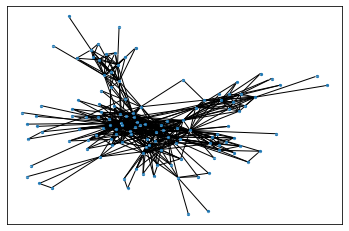

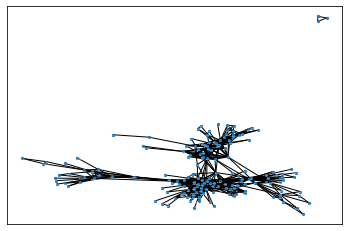

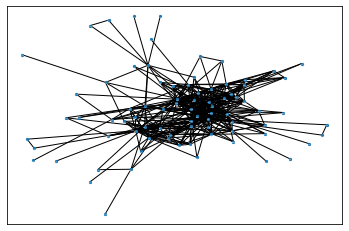

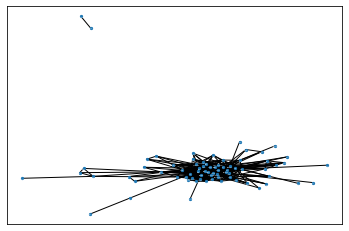

In [23]:
for season in ["s1", "s4", "s7", "s8"]:
    social_network = load_unweighted_network_got("data/got-" + season + "-nodes.csv", "data/got-" + season + "-edges.csv")
    nx.draw_networkx(social_network, font_color='white', node_size=5, font_size=1)
    plt.show()

# 2. Personnages influents dans GOT / Influent character in GOT (6 points)

##  Analyse d'un réseau social 
Une autre analyse intéressante à faire avec un réseau social est de trouver les personnes influentes du réseau soit les personnes autour desquelles les gens du réseau se regroupent.

Il existe des mesures qui permettent de connaître ces personnes: les mesures de centralité. **Vous devez implémenter les mesures vous-même et ne pas utilisez les implémentations de `networkx` de ces mesures.** Pour vous aider lors de l'implémentation de ses mesures, un deuxième toy dataset vous est fourni. Il ressemble à ceci (data/picture2.png):
![title](data/picture2.png)

## GOT datasets
La série Games of Thrones est reconnue pour tuer ses personnages importants. Nous vous demandons de vérifier cette affirmation. Pour cette partie, vous devez utiliser tous les CSV donnés avec le TP (nodes, edges et deaths). Nous voulons que vous trouviez les personnages les plus influents de chaque saison et que vous les compariez avec la liste de personnages morts durant la saison.

---

##  Social network analysis

Another interesting analysis to do with a social network is to find the influential people in the network, ie the people around whom the people in the network gather.

There are measures which make it possible to know these people: the centrality measures. **You must implement those metrics yourselves. Do not use `networkx` implementation for the  tp.** To help you during the implementation of those measurements, a second toy dataset is provided to you. It looks like this (data/picture2.png): ![title](data/picture2.png)

## GOT datasets
The Games of Thrones series is known to kill its important characters. We ask you to verify this statement. For this part, you must use all the csv given with the TP (nodes, edges and deaths). We want you to find the most influential characters from each season and compare them with the list of dead characters during the season.


## 2.1 Centralité de degré / Degree centrality (1 point)

Une première mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de degré. Elle se calcule $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: un sommet dans le réseau
- n: le nombre de sommets
- degree: le nombre d'arêtes attachées au sommet

#### Implémentation
1. Implémenter la fonction `calculate_degree_centrality`. Cette fonction calcule la centralité de degré pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_degree_centrality` pour vérifier votre implémentation. Le sommet 1 devrait avoir la plus haute mesure de 0.4.

---

A first simple measure to find the importance of a node in a network is the degree centrality. It is calculated $$C_{D}(i) = \frac{degree(i)}{n-1}$$

- i: a node in the network
- n: the number of nodes
- degree: the number of edges attached to the node

#### Implementation
1. Implement the function `calculate_degree_centrality`. This function calculates degree centrality for all nodes in the network and adds this measurement to each node.

Use the function `test_degree_centrality` to verify your implementation. The best node should be node 1 with 0.4.

In [23]:
def calculate_degree_centrality(social_network):
    #TODO (utiliser degree = tricher ??)
    list_nodes = list(social_network.nodes)
    number_nodes = len(list_nodes)
    for u in list_nodes:
        social_network.nodes[u]['degree_centrality']=social_network.degree[u]/(number_nodes-1)

In [24]:
def test_degree_centrality():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    calculate_degree_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'degree_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest degree centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))
test_degree_centrality()

Highest degree centrality node: 1 with 0.400


## 2.2 Centralité de proximité / Closeness centrality (1 point)

Une autre mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité de proximité. Elle se calcule $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: un sommet dans le réseau
- AvDist: la moyenne de toutes les distances les plus courtes pour atteindre chaque sommet à partir du sommet i

#### Implémentation
1. Implémenter la fonction `calculate_closeness_centrality`. Cette fonction calcule la centralité de proximité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet. Considérer chaque arête comme une distance de 1.

**NB**: Utiliser la fonction `shortest_path()` du module Networkx pour trouver le chemin le plus court entre des sommets

Utilisez la fonction `test_closeness_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.577.

---

Another simple measure for finding the importance of a node in a network is closeness centrality. It is calculated $$C_{P}(i) = \frac{1}{AvDist(i)}$$

- i: a node in the network
- AvDist: the average of all shortest distances to reach each vertex from vertex i

#### Implementation
1. Implement the function `calculate_closeness_centrality`. This function calculates closeness centrality for all nodes in the network and adds this measurement to each node. Consider each edge as a distance of 1.

**NB**: Use the fucntion `shortest_path()` from Networkx to find the shortest path between two nodes.

Use the function `test_closeness_centrality` to verify your implementation. The best node should be node 7 with 0.577.

In [25]:
def calculate_closeness_centrality(social_network):
    #TODO (done)
    list_nodes=list(social_network.nodes)
    number_nodes=len(list_nodes)
    for u in list_nodes:
        av_dist=0
        for v in list_nodes:
            av_dist+=len(nx.shortest_path(social_network,u,v))-1
        social_network.nodes[u]['closeness_centrality']=(number_nodes-1)/av_dist

In [26]:
def test_closeness_centrality():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    calculate_closeness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'closeness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest closeness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_closeness_centrality()

Highest closeness centrality node: 7 with 0.577


## 2.3 Centralité d'intermédiarité / Betweeness centrality (1 point)

Une dernière mesure simple pour trouver l'importance d'un sommet dans un réseau est la centralité d'intermédiarité. Elle se calcule $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n}{2}}$$

- n: le nombre de sommets dans le réseau
- i: un sommet dans le réseau
- j,k: deux sommets dans le réseau excluant i
- $f_{jk}(i)$: le nombre de chemin le plus court partant du sommet j vers un sommet k (> j) passant par le sommet i 

#### Implémentation
1. Implémenter la fonction `calculate_betweenness_centrality`. Cette fonction calcule la centralité d'intermédiarité pour tous les sommets du réseau et ajoute cette mesure à chaque sommet.

Utilisez la fonction `test_betweennes_centrality` pour vérifier votre implémentation. Le sommet 7 devrait avoir la plus haute mesure de 0.45.

---

A final simple measure to find the importance of a node in a network is the betweeness centrality. It is calculated $$C_{I}(i) = \frac{\sum_{j<k}f_{jk}(i)}{\binom{n}{2}}$$

- n: the number of nodes in the network
- i: a node in the network
- j,k: two nodes in the network excluding i
- $f_{jk}(i)$: the  number of shortest paths from vertex j to vertex k (> j) passing through node i

#### Implementation
1. Implement the function `calculate_betweenness_centrality`.This function calculates the betweenness centrality for all the nodes of the network and adds this measurement to each node.

Use the function `test_betweennes_centrality` to verify your implementation. The best node should be the node 7 with 0.45.


In [27]:
def calculate_betweenness_centrality(social_network):
    #TODO (done)
    list_nodes=list(social_network.nodes)
    number_nodes=len(list_nodes)
    for i in list_nodes:
        list_nodes=list(social_network.nodes)
        list_nodes.remove(i)
        frequency_sum=0
        ind_j=0
        for j in list_nodes:
            for k in [list_nodes[u] for u in range(number_nodes-1) if u>ind_j]:
                frequency=0
                shortest_path=list(nx.all_shortest_paths(social_network,j,k))
                nb_shortest_path=len(shortest_path)
                for path in shortest_path:
                    if i in path:
                        frequency+=1
                frequency=frequency/nb_shortest_path
                frequency_sum+=frequency
            ind_j+=1
        social_network.nodes[i]['betweenness_centrality']=frequency_sum/(number_nodes-1)/(number_nodes-2)*2

In [28]:
def test_betweenness_centrality():
    social_network = load_unweighted_network("data/toy-nodes.csv", "data/toy-edges.csv")
    calculate_betweenness_centrality(social_network)
    dict_centrality = nx.get_node_attributes(social_network, 'betweenness_centrality')
    best_node = max(dict_centrality, key=dict_centrality.get)
    print("Highest betweenness centrality node: {} with {:.3f}".format(best_node, dict_centrality[best_node]))

test_betweenness_centrality()

Highest betweenness centrality node: 7 with 0.525


## 2.4 Analyse de vos résultats / Analysis of your results (3 points)

Executez les trois fonctions sur les réseaux de chaque saison et présentez le top 10 pour chaque mesure. **Les graphes des saisons 2, 4 et 6 sont déconnectés. Dans ce cas, considérez la plus grande composante connexe**. Pour chaque saison, comparez le top 10 des mesures avec la liste de morts de la saison disponible dans les csv death. Répondez aux questions suivantes. Elles sont des pistes de réflexions pour votre analyse.

- Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison? 
- Quelle mesure semble mieux prédire les morts? 
- Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?

**N.B.:** Si vous ne connaissez pas la série et vous n'êtes pas sûrs quels morts peuvent être considérés importants, faites une recherche Google sur les personnages importants. Mentionnez votre démarche et la conclusion de vos recherches. Il n'y a pas une liste précise de morts importants. Évidemment si vous me dite que Daenerys n'est pas importante, je vais douter de vos recherches. Le but est de voir votre travail de réflexion et d'analyse des mesures de centralité. 

---

Run the three functions on the networks of each season and present the top 10 for each metric. **The season 2, 4 and 6 graphs are disconnected. In that case, consider the largest connected component**. For each season, compare the top 10 metrics with the season's death list in the death csv. Answer the following questions. They are guide for your analysis.

- Is the top 10 enough to find the significant deaths of each season? 
- What measure seems to better predict the dead? 
- Is the reputation of Games of Thrones for killing many important characters founded?

**N.B:** If you don't know the series and aren't sure which deaths are considered important, do a Google research on the important characters in the series. Metion your research and the conclusion of it. There isn't a precise list of important deaths but if you tell me that Daenerys isn't important, I will doubt of the seriousness of your research. The goal is to see how your analyse the results giving by centrality metrics.

### Résultats / Results

In [29]:
import pandas as pd

In [31]:
# Mettez le code pour présenter les résultats ici

def season_results(season):
    nodes_saison = "data/got-" + season + "-nodes.csv"
    edges_saison = "data/got-" + season + "-edges.csv"
    deaths_saison = "data/got-" + season + "-deaths.csv"
    top=10

    social_network = load_unweighted_network_got(nodes_saison, edges_saison)
    for u in social_network.nodes:
        social_network.nodes[u]['dead']=False
    with open(deaths_saison) as csv_death:
        csv_n=csv.reader(csv_death,delimiter=',')
        i=0
        for row in csv_n:
            if i==0:
                i+=1
            else:
                social_network.nodes[row[0]]['dead']=True

    connected_max=0
    subset={}
    for u in list(nx.connected_components(social_network)):
        if len(u)>connected_max:
            connected_max=len(u)
            subset=u
    social_network=nx.subgraph(social_network,subset)

    calculate_degree_centrality(social_network)
    calculate_closeness_centrality(social_network)
    calculate_betweenness_centrality(social_network)

    dict_degree = nx.get_node_attributes(social_network, 'degree_centrality')
    dict_closeness = nx.get_node_attributes(social_network, 'closeness_centrality')
    dict_betweenness = nx.get_node_attributes(social_network, 'betweenness_centrality')

    ##liste des personnages morts
    dead_list=[]
    for u in social_network.nodes:
        if social_network.nodes[u]['dead']:
            dead_list.append(u)
    print("\nListe des morts :")
    display(pd.DataFrame(dead_list,columns=['name']))

    ##centralité de degré
    best_nodes_degree=[]
    for i in range(top):
        best_node = max(dict_degree, key=dict_degree.get)
        best_nodes_degree.append((best_node,dict_degree[best_node],social_network.nodes[best_node]['dead']))
        dict_degree[best_node]=0
    ratio=0
    for (_,_,u) in best_nodes_degree:
        if u:
            ratio+=1

    print('TOP 10 CENTRALITE DE DEGRE :')
    display(pd.DataFrame(best_nodes_degree,columns=['name','centrality degree','dead']))
    print('Pourcentage de personnages morts dans le top 10 pour la centralité de degré : {}%'.format(ratio/10*100))

    ##centralité de proximité
    best_nodes_closeness=[]
    for i in range(top):
        best_node = max(dict_closeness, key=dict_closeness.get)
        best_nodes_closeness.append((best_node,dict_closeness[best_node],social_network.nodes[best_node]['dead']))
        dict_closeness[best_node]=0
    ratio=0
    for (_,_,u) in best_nodes_closeness:
        if u:
            ratio+=1

    print('\nTOP 10 CENTRALITE DE PROXIMITE :')
    display(pd.DataFrame(best_nodes_closeness,columns=['name','closeness centrality','dead']))
    print('Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : {}%'.format(ratio/10*100))

    ##centralité d'intermédiarité
    best_nodes_betweenness=[]
    for i in range(top):
        best_node = max(dict_betweenness, key=dict_betweenness.get)
        best_nodes_betweenness.append((best_node,dict_betweenness[best_node],\
                                       social_network.nodes[best_node]['dead']))
        dict_betweenness[best_node]=0
    ratio=0
    for (_,_,u) in best_nodes_betweenness:
        if u:
            ratio+=1

    print("\nTOP 10 CENTRALITE D'INTERMEDIARITE :")
    display(pd.DataFrame(best_nodes_betweenness,columns=['name','betweeness centrality','dead']))
    print("Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : {}%".format(ratio/10*100))


### Saison 1
print("SAISON 1")
season_results("s1")



SAISON 1

Liste des morts :


name
0         STABLE_BOY
1       WAYMAR_ROYCE
2              GARED
3      SEPTA_MORDANE
4               WILL
5             BENJEN
6                NED
7              MYCAH
8             RHAEGO
9              DROGO
10             VARLY
11       JORY_CASSEL
12              MAGO
13             QOTHO
14       SYRIO_FOREL
15    MIRRI_MAZ_DUUR
16         JON_ARRYN
17  HUGH_OF_THE_VALE
18       VARDIS_EGEN
19            ROBERT
20           VISERYS

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0      NED              0.456   True
1   TYRION              0.328  False
2   ROBERT              0.288   True
3  CATELYN              0.288  False
4     ROBB              0.240  False
5   CERSEI              0.232  False
6     ARYA              0.224  False
7  JOFFREY              0.216  False
8    SANSA              0.208  False
9      JON              0.208  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 20.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0      NED              0.628141   True
1   ROBERT              0.553097   True
2  CATELYN              0.550661  False
3   TYRION              0.543478  False
4      JON              0.518672  False
5     ROBB              0.512295  False
6  JOFFREY              0.510204  False
7   CERSEI              0.508130  False
8     ARYA              0.502008  False
9    JAIME              0.498008  False

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 20.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0       NED               0.303280   True
1    TYRION               0.163027  False
2   CATELYN               0.118284  False
3    ROBERT               0.110395   True
4  DAENERYS               0.101431  False
5       JON               0.085336  False
6      ROBB               0.080001  False
7      ARYA               0.066006  False
8       PYP               0.060911  False
9     JORAH               0.053910  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 20.0%


In [32]:
### Saison 2
print("SAISON 2")
season_results("s2")

SAISON 2

Liste des morts :


name
0          BLACK_LORREN
1                MANDON
2   WINTERFELL_SHEPHERD
3                 AMORY
4                 BILLY
5           HIGH_SEPTON
6                 RENLY
7                DAGMER
8                RODRIK
9                 BARRA
10                ALTON
11                YOREN
12              CRESSEN
13        MAESTER_LUWIN
14              TORRHEN
15                LOMMY
16              TICKLER
17              RENNICK
18              MATTHOS
19               QHORIN

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0  JOFFREY           0.315789  False
1   TYRION           0.289474  False
2   CERSEI           0.271930  False
3     ROBB           0.245614  False
4     ARYA           0.236842  False
5    TYWIN           0.219298  False
6  CATELYN           0.201754  False
7  STANNIS           0.192982  False
8      NED           0.175439  False
9    THEON           0.175439  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 0.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0       JOFFREY              0.535211  False
1        TYRION              0.535211  False
2           NED              0.518182  False
3          ROBB              0.506667  False
4        CERSEI              0.502203  False
5       CATELYN              0.497817  False
6          ARYA              0.483051  False
7         SANSA              0.481013  False
8  LITTLEFINGER              0.481013  False
9         TYWIN              0.478992  False

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 0.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0     ARYA               0.190603  False
1   TYRION               0.178032  False
2     ROBB               0.147703  False
3      JON               0.139918  False
4      NED               0.131636  False
5  JOFFREY               0.126821  False
6    THEON               0.107967  False
7  CATELYN               0.082283  False
8    TYWIN               0.081580  False
9   CERSEI               0.077179  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 0.0%


In [33]:
### Saison 3
print("SAISON 3")
season_results("s3")

SAISON 3

Liste des morts :


name
0                ROBB
1             CRASTER
2                 ROS
3               BERIC
4              MARTYN
5             JOYEUSE
6            PRENDAHL
7            TORTURER
8                JEOR
9    WILLEM_LANNISTER
10              ORELL
11             TALISA
12   RICKARD_KARSTARK
13               MERO
14           GREIZHEN
15             HOSTER
16  KRAZNYS_MO_NAKLOZ
17            CATELYN

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0          ROBB           0.254098   True
1         TYWIN           0.237705  False
2        TYRION           0.204918  False
3       JOFFREY           0.172131  False
4       CATELYN           0.172131   True
5        CERSEI           0.163934  False
6         SANSA           0.155738  False
7           JON           0.155738  False
8  ROOSE_BOLTON           0.147541  False
9         JAIME           0.139344  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 20.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0     ROBB              0.478431   True
1      NED              0.455224  False
2  CATELYN              0.450185   True
3    TYWIN              0.448529  False
4  JOFFREY              0.425087  False
5    JAIME              0.416382  False
6   TYRION              0.416382  False
7     BRAN              0.412162  False
8  STANNIS              0.408027  False
9    SANSA              0.406667  False

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 20.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0     ROBB               0.240762   True
1      NED               0.176358  False
2   ROBERT               0.162496  False
3     BRAN               0.150256  False
4      JON               0.137802  False
5    TYWIN               0.128484  False
6  CATELYN               0.113758   True
7      SAM               0.102784  False
8   TYRION               0.098530  False
9  STANNIS               0.077696  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 20.0%


In [34]:
### Saison 4
print("SAISON 4")
season_results("s4")

SAISON 4

Liste des morts :


name
0           POLLIVER
1              BITER
2       OLLYS_MOTHER
3          DYING_MAN
4        DONNEL_HILL
5              TANSY
6             COOPER
7               SHAE
8              JOJEN
9     MAG_THE_MIGHTY
10  MOLES_TOWN_WHORE
11              RAST
12        THENN_WARG
13            GUYMON
14              ZALA
15             GRENN
16             TYWIN
17              RALF
18       KARL_TANNER
19             RORGE
20           YGRITTE
21           JOFFREY
22             LOCKE
23     AXELL_FLORENT
24              STYR
25            OBERYN
26     ADRACK_HUMBLE
27            DONTOS
28              LYSA
29               PYP
30   DONGO_THE_GIANT

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0  JOFFREY           0.239521   True
1   TYRION           0.227545  False
2   CERSEI           0.197605  False
3    SANSA           0.179641  False
4      JON           0.179641  False
5    JAIME           0.173653  False
6    TYWIN           0.167665   True
7   OBERYN           0.149701   True
8      SAM           0.149701  False
9     ARYA           0.143713  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 30.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0  JOFFREY              0.460055   True
1    JAIME              0.434896  False
2      NED              0.427110  False
3   CERSEI              0.416459  False
4   TYRION              0.413366  False
5    TYWIN              0.410319   True
6    SANSA              0.409314  False
7  STANNIS              0.397619  False
8   TOMMEN              0.383908  False
9     ARYA              0.383908  False

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 20.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0    JOFFREY               0.213982   True
1        NED               0.200391  False
2    STANNIS               0.185546  False
3        JON               0.151108  False
4      VARYS               0.112297  False
5  BARRISTAN               0.107356  False
6       ARYA               0.100028  False
7   DAENERYS               0.096133  False
8     TYRION               0.094955  False
9      JAIME               0.079840  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 10.0%


In [35]:
### Saison 5
print("SAISON 5")
season_results("s5")

SAISON 5

Liste des morts :


name
0          SELYSE
1         STANNIS
2         HIZDAHR
3          CERWYN
4         MYRANDA
5           JANOS
6        MYRCELLA
7     MERYN_TRANT
8       BARRISTAN
9          LOBODA
10       MOSSADOR
11          MANCE
12        SHIREEN
13          KARSI
14            JON
15  MAESTER_AEMON
16  LORD_OF_BONES

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0        CERSEI           0.254237  False
1           JON           0.211864   True
2  LITTLEFINGER           0.211864  False
3       STANNIS           0.203390   True
4         SANSA           0.177966  False
5           SAM           0.169492  False
6        TYRION           0.161017  False
7         JAIME           0.144068  False
8      DAENERYS           0.118644  False
9         BRONN           0.101695  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 20.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0        CERSEI              0.459144  False
1  LITTLEFINGER              0.455598  False
2       STANNIS              0.452107   True
3         SANSA              0.445283  False
4  ROOSE_BOLTON              0.435424  False
5        ROBERT              0.424460  False
6       PODRICK              0.406897  False
7         JAIME              0.402730  False
8           NED              0.402730  False
9         TYWIN              0.400000  False

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 10.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0       STANNIS               0.323907   True
1        CERSEI               0.267037  False
2  LITTLEFINGER               0.189207  False
3           JON               0.155993   True
4         SANSA               0.129959  False
5        TYRION               0.126352  False
6         JAIME               0.120962  False
7  ROOSE_BOLTON               0.117744  False
8        ROBERT               0.104169  False
9           SAM               0.074083  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 20.0%


In [36]:
### Saison 6
print("SAISON 6")
season_results("s6")

SAISON 6

Liste des morts :


name
0            BELICHO
1           MARGAERY
2            PODRICK
3               MACE
4         LADY_CRANE
5     ALLISER_THORNE
6       BLACK_WALDER
7   THREE_EYED_RAVEN
8              WALDA
9              BALON
10         KHAL_MORO
11            TOMMEN
12            HARALD
13            RAZDAL
14             HODOR
15       SON_OFWALDA
16           PYCELLE
17              OLLY
18       BOWEN_MARSH
19          SMALLJON
20              WAIF
21      ROOSE_BOLTON
22            LOTHAR
23              OSHA
24          TRYSTANE
25            LANCEL
26            RICKON
27    OTHELL_YARWYCK
28      HIGH_SPARROW
29              AREO
30              LEAF
31           WUN_WUN
32            RAMSAY
33            WALDER
34             KEVAN
35             DORAN
36           BRYNDEN

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0     SANSA           0.300752  False
1       JON           0.233083  False
2    CERSEI           0.203008  False
3    TYRION           0.195489  False
4     JAIME           0.180451  False
5       NED           0.172932  False
6     DAVOS           0.172932  False
7   TORMUND           0.157895  False
8    RAMSAY           0.142857   True
9  DAENERYS           0.135338  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 10.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0     SANSA              0.513514  False
1    TYRION              0.455479  False
2       JON              0.449324  False
3    CERSEI              0.443333  False
4     JAIME              0.438944  False
5       NED              0.430421  False
6      ARYA              0.429032  False
7  MARGAERY              0.423567   True
8   BRIENNE              0.419558  False
9   PODRICK              0.415625   True

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 20.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0     SANSA               0.295295  False
1       JON               0.215149  False
2    TYRION               0.167009  False
3     JAIME               0.146678  False
4    CERSEI               0.131801  False
5    OLENNA               0.127705  False
6       NED               0.126687  False
7       SAM               0.115026  False
8     THEON               0.096375  False
9  DAENERYS               0.093547  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 0.0%


In [37]:
### Saison 7
print("SAISON 7")
season_results("s7")

SAISON 7

Liste des morts :


name
0       NYMERIA
1        DICKON
2  WHITE_WALKER
3       RANDYLL
4        THOROS
5        BENJEN
6        OLENNA
7         OBARA
8  LITTLEFINGER

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0       JON             0.5375  False
1  DAENERYS             0.4250  False
2    TYRION             0.4250  False
3    CERSEI             0.3875  False
4     DAVOS             0.3375  False
5     SANSA             0.3000  False
6     THEON             0.3000  False
7   BRIENNE             0.3000  False
8     HOUND             0.2875  False
9     JAIME             0.2750  False

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 0.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0       JON              0.661157  False
1    TYRION              0.601504  False
2  DAENERYS              0.588235  False
3    CERSEI              0.575540  False
4     DAVOS              0.559441  False
5   BRIENNE              0.547945  False
6     SANSA              0.536913  False
7     JAIME              0.529801  False
8     THEON              0.529801  False
9     HOUND              0.522876  False

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 0.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0       JON               0.237362  False
1  DAENERYS               0.115152  False
2    CERSEI               0.112057  False
3       SAM               0.104418  False
4     SANSA               0.091089  False
5    TYRION               0.083104  False
6      BRAN               0.068158  False
7     JORAH               0.049585  False
8     THEON               0.048359  False
9      ARYA               0.038881  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 0.0%


In [38]:
### Saison 8
print("SAISON 8")
season_results("s8")

SAISON 8

Liste des morts :


name
0              NORA
1            QYBURN
2        MELISANDRE
3             QHONO
4    LYANNA_MORMONT
5             HARRY
6   EDDISON_TOLLETT
7          DAENERYS
8             JAIME
9             THEON
10            EURON
11        NED_UMBER
12         MOUNTAIN
13           CERSEI
14            VARYS
15             ALYS
16            HOUND
17            BERIC
18        MISSANDEI
19       NIGHT_KING

TOP 10 CENTRALITE DE DEGRE :


name  centrality degree   dead
0        SAM           0.591549  False
1   DAENERYS           0.577465   True
2     TYRION           0.577465  False
3      SANSA           0.563380  False
4       ARYA           0.549296  False
5  GREY_WORM           0.535211  False
6      DAVOS           0.521127  False
7        JON           0.507042  False
8    BRIENNE           0.478873  False
9      JAIME           0.450704   True

Pourcentage de personnages morts dans le top 10 pour la centralité de degré : 20.0%

TOP 10 CENTRALITE DE PROXIMITE :


name  closeness centrality   dead
0        SAM              0.696078  False
1   DAENERYS              0.689320   True
2     TYRION              0.689320  False
3      DAVOS              0.663551  False
4      SANSA              0.657407  False
5       ARYA              0.657407  False
6    BRIENNE              0.645455  False
7  GREY_WORM              0.645455  False
8        JON              0.633929  False
9      JAIME              0.633929   True

Pourcentage de personnages morts dans le top 10 pour la centralité de proximité : 20.0%

TOP 10 CENTRALITE D'INTERMEDIARITE :


name  betweeness centrality   dead
0  DAENERYS               0.141607   True
1       SAM               0.104838  False
2      ARYA               0.104719  False
3     BRONN               0.087143  False
4    TYRION               0.066749  False
5     SANSA               0.063448  False
6       JON               0.060275  False
7     JAIME               0.055334   True
8     VARYS               0.050389   True
9   BRIENNE               0.042790  False

Pourcentage de personnages morts dans le top 10 pour la centralité d'intermédiarité : 30.0%


### Analyse / Analysis

#### Est-ce que le top 10 est suffisant pour trouver les morts importants de chaque saison?
Non, le top 10 ne semble pas suffisant, car le top 10 des personnages importants selon différentes mesures de centralités ne contient pas un grand pourcentage de morts. En effet, si nous ne devions nous baser que sur le top 10 pour deviner quel personnages importants allaient mourir, nous n'aurions pas raison souvent, puisqu'environ seulement 13% des personnages importants du top 10 meurent dans une saison. Ainsi, nous n'aurions qu'une chance sur huit de deviner le bon personnage. Cependant, même si nous prenons un top plus grand, nous n'allons pas nécessairement inclure assez de morts pour augmenter drastiquement ce pourcentage. En effet, un grand nombre des morts dans les saisons sont des personnages qui n'ont pas une grande importance et donc ils ne sont pas au top avec les mesures de centralité. Ainsi, le top 10 n'est pas vraiment suffisant pour prédire les morts importants d'une saison, mais même si nous prenions un top contenant plus d'individus (par exemple top 15 ou top 20), cela n'améliorerait pas nécessairement les résultats. Il est difficile de prédire les morts importants seulement à partir des mesures de centralité des personnages importants.


#### Quelle mesure semble mieux prédire les morts?
La mesure de centralité de degré prédit en moyenne 15% des morts:
    (20 + 0 + 20 + 30 + 20 + 10 + 0 + 20)/8 = 15%
La mesure de centralité de proximité prédit en moyenne 11,25% des morts:
    (20 + 0 + 20 + 20 + 10 + 20 + 0 + 0)/8 = 11,25%
La mesure de centralité d'intermédiarité prédit en moyenne 12,5% des morts:
    (20 + 0 + 20 + 10 + 20 + 0 + 0 + 30)/8 = 12,5%

Ainsi, on peut en conclure que la mesure de centralité de degré semble prédire un peu mieux les morts avec 15% des morts importants de la saison parmi le top 10 des personnages selon la mesure de centralité de degré. Bien que ce 15% puisse sembler faible, il est toutefois supérieur aux 11,25% et 12,5% obtenus avec les mesures de centralité de proximité et de centralité d'intermédiarité respectivement.


#### Est-ce que la réputation de Games of Thrones de tuer plusieurs de ses personnages importants est fondée?
Les résultats obtenus des pourcentages de morts dans le top 10 des différentes mesures de centralité sont assez faibles, en tournant généralement autour de 11,25% à 15%, soit environ 13%. Ainsi, on peut constater qu'environ un personnage sur huit parmi les plus importants de chaque saison fini par mourir durant cette même saison. Ce pourcentage peut paraitre faible, mais lorsqu'on considère le nombre de différents personnages principaux dans la série entière de Game of Thrones, soit plus de 50 (https://www.thewrap.com/all-52-game-of-thrones-main-characters-ranked-coronavirus-quarantine-jon/), on constate que ce pourcentage représente un grand nombre de personnages importants. On peut donc en conclure que Games of Thrones mérite sa réputation de tuer plusieurs de ses personnages importants. Toutefois, puisque seul environ 13% des peronnages importants du top 10 meurent dans une saison, il serait difficile de prédire quel personnage va mourir à chaque saison seulement en regardant ces mesures de centralité dans l'ensemble des personnages. En effet, nous n'aurions qu'une chance sur huit environ de prédire qu'un de ces personnages importants va mourir dans la saison.